In [1]:
import os
import pickle
import json
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import pearsonr

rcParams["font.family"] = "serif"
rcParams["grid.linestyle"] = ':'
rcParams["xtick.direction"] = 'in'
rcParams["ytick.direction"] = 'in'
rcParams["legend.fontsize"] = 11
rcParams["axes.labelsize"] = 18
rcParams["axes.titlesize"] = 20
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15

In [2]:
plot_file_template = './plots/log-linear-all-datasets-plot-counttype_{}_prompttype_{}_ptdataset_{}_model_{}.pkl'

## CC-3M

In [3]:
image_search_types = [
    'rampp0.5',
    'rampp0.6',
    'rampp0.7'
]

/tmp/ipykernel_148476/3211609516.py:37: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 9*10**5)


<Figure size 640x480 with 0 Axes>

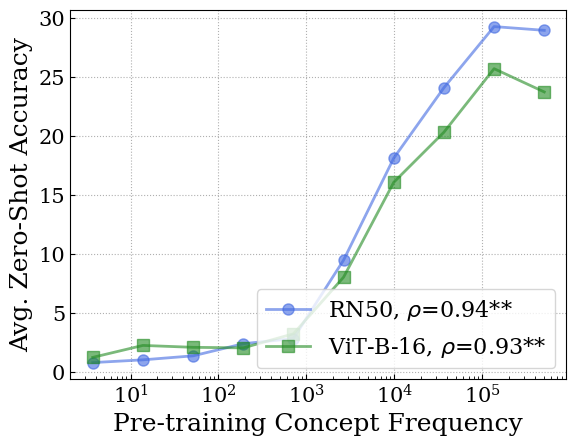

<Figure size 640x480 with 0 Axes>

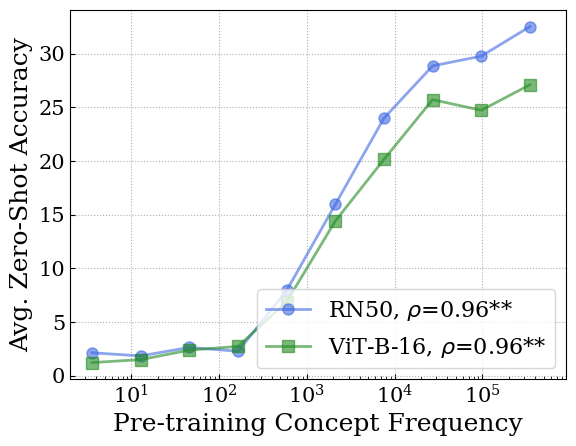

<Figure size 640x480 with 0 Axes>

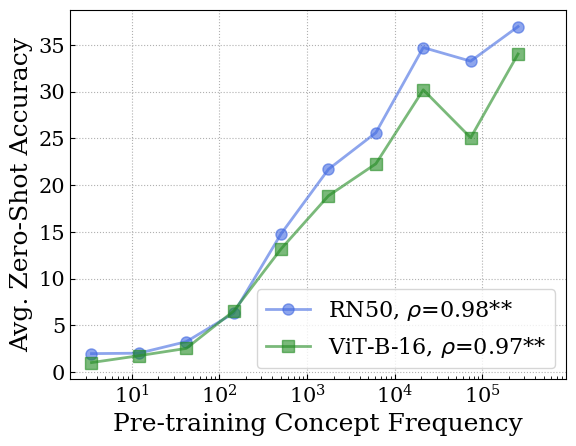

In [4]:
for ist in image_search_types:

    prompt_type = 'class'
    image_search_type = ist
    text_search_type = 'lemmatized'
    integrated_search_type = 'integrated_rampp0.7'
    pt_dataset = 'cc3m'
    
    # image-search
    rn50_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # text-search
    rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # integrated-search
    rn50_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))


    plt.figure(figsize=(6.4, 4.8))
    # image-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_image_res['exp_bins'][1:-1]), rn50_image_res['cum_means'][1:-1])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_image_res['exp_bins'][1:-1]), vitb16_image_res['cum_means'][1:-1])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    
    plt.figure()
    plt.plot(rn50_image_res['exp_bins'][1:-1], rn50_image_res['cum_means'][1:-1], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_image_res['exp_bins'][1:-1], vitb16_image_res['cum_means'][1:-1], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. Zero-Shot Accuracy')
    plt.xscale('log')
    plt.xlim(0, 9*10**5)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=16)
    
    # plt.text(0.05, 0.95, f'RN50 Pearson r={rn50_corr:.2f}', transform=plt.gca().transAxes, color='royalblue')
    # plt.text(0.05, 0.90, f'ViT-B-16 Pearson r={vitb16_corr:.2f}', transform=plt.gca().transAxes, color='forestgreen')
    
    # plt.title('Accuracies vs PCF for CC-3M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-cc3m-zero-shot-log-linear-plot-image-queried-search-rampp-threshold-{}.png'.format(ist), dpi=500, bbox_inches='tight', transparent=True)



## CC-12M

In [5]:
image_search_types = [
    'rampp0.5',
    'rampp0.6',
    'rampp0.7'
]

/tmp/ipykernel_148476/400139601.py:35: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 3*10**6)


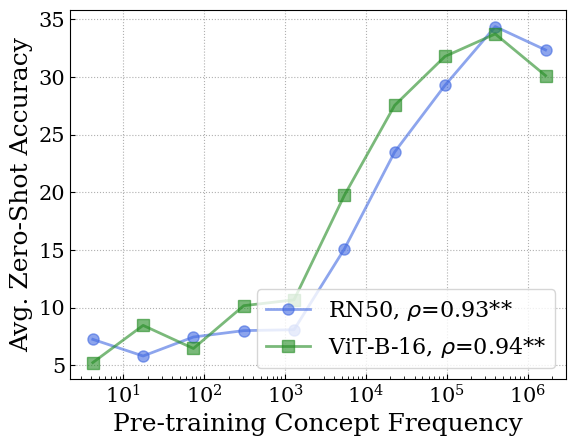

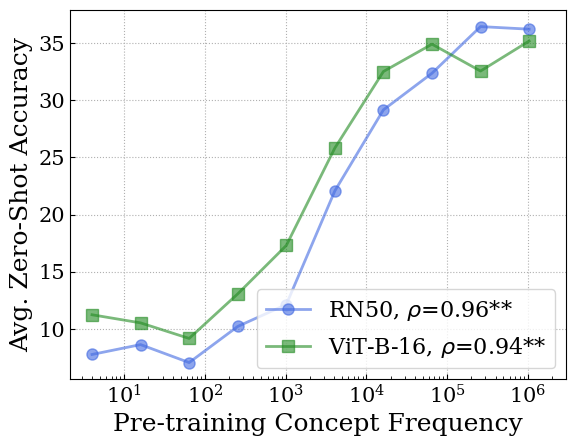

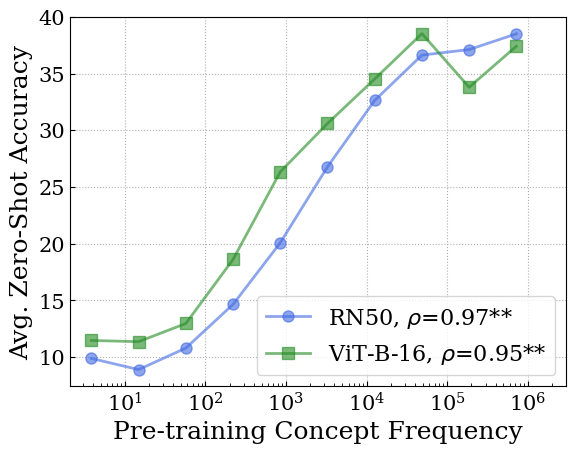

In [6]:
for ist in image_search_types:
    prompt_type = 'class'
    image_search_type = ist
    text_search_type = 'lemmatized'
    pt_dataset = 'cc12m'
    integrated_search_type = 'integrated_rampp0.7'
    
    # image-search
    rn50_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # text-search
    rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # integrated-search
    rn50_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))


    plt.figure(figsize=(6.4, 4.8))
    # image-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_image_res['exp_bins'][1:-1]), rn50_image_res['cum_means'][1:-1])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_image_res['exp_bins'][1:-1]), vitb16_image_res['cum_means'][1:-1])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    
    plt.plot(rn50_image_res['exp_bins'][1:-1], rn50_image_res['cum_means'][1:-1], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_image_res['exp_bins'][1:-1], vitb16_image_res['cum_means'][1:-1], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. Zero-Shot Accuracy')
    plt.xscale('log')
    plt.xlim(0, 3*10**6)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=16)
    
    # plt.title('Accuracies vs PCF for CC-12M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-cc12m-zero-shot-log-linear-plot-image-queried-search-rampp-threshold-{}.png'.format(ist), dpi=500, bbox_inches='tight', transparent=True)



## LAION400M

In [7]:
image_search_types = [
    'rampp0.5',
    'rampp0.6',
    'rampp0.7'
]

/tmp/ipykernel_148476/1793808885.py:37: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 9*10**7)


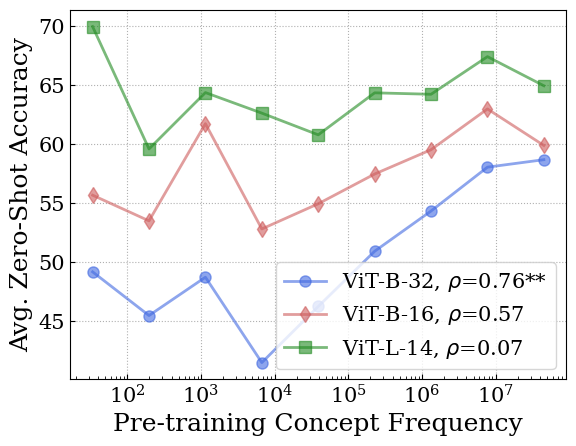

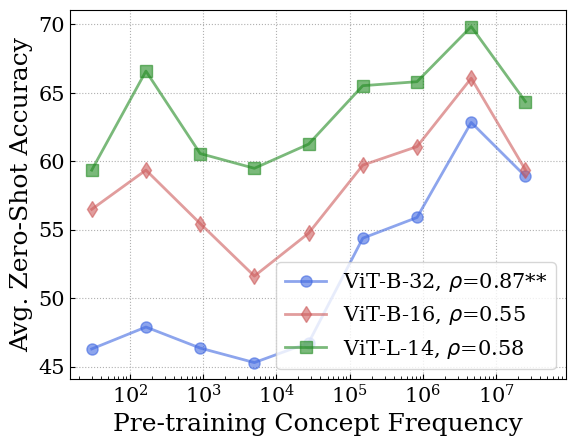

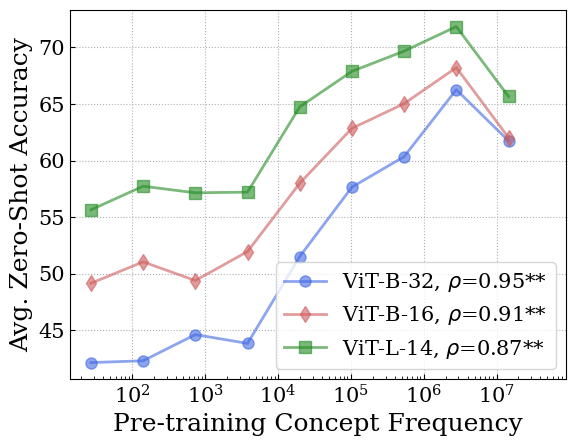

In [8]:
for ist in image_search_types:
    prompt_type = 'class'
    image_search_type = ist
    text_search_type = 'lemmatized'
    pt_dataset = 'laion400m'
    
    # image-search
    # rn50_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb32_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-32'), 'rb'))
    vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    vitl14_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-L-14'), 'rb'))
    
    # text-search
    # rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    vitb32_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-32'), 'rb'))
    vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    vitl14_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-L-14'), 'rb'))


    plt.figure(figsize=(6.4, 4.8))
    # image-search
    
    vitb32_corr, sig1 = pearsonr(np.log(vitb32_image_res['exp_bins'][2:-1]), vitb32_image_res['cum_means'][2:-1])
    vitb16_corr, sig2 = pearsonr(np.log(vitb16_image_res['exp_bins'][2:-1]), vitb16_image_res['cum_means'][2:-1])
    vitl14_corr, sig3 = pearsonr(np.log(vitl14_image_res['exp_bins'][2:-1]), vitl14_image_res['cum_means'][2:-1])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    add3 = '**' if sig3<0.05 else ''
    
    plt.plot(vitb32_image_res['exp_bins'][2:-1], vitb32_image_res['cum_means'][2:-1], marker='o', linestyle='solid', label=f'ViT-B-32, $\\rho$={vitb32_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(vitb16_image_res['exp_bins'][2:-1], vitb16_image_res['cum_means'][2:-1], marker='d', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='indianred')
    plt.plot(vitl14_image_res['exp_bins'][2:-1], vitl14_image_res['cum_means'][2:-1], marker='s', linestyle='solid', label=f'ViT-L-14, $\\rho$={vitl14_corr:.2f}'+add3, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. Zero-Shot Accuracy')
    plt.xscale('log')
    plt.xlim(0, 9*10**7)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=15)
    
    # plt.title('Accuracies vs PCF for LAION-400M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-laion400m-zero-shot-log-linear-plot-image-queried-search-rampp-threshold-{}.png'.format(ist), dpi=500, bbox_inches='tight', transparent=True)



## YFCC15M

In [9]:
image_search_types = [
    'rampp0.5',
    'rampp0.6',
    'rampp0.7'
]

/tmp/ipykernel_148476/292218428.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 9*10**6)


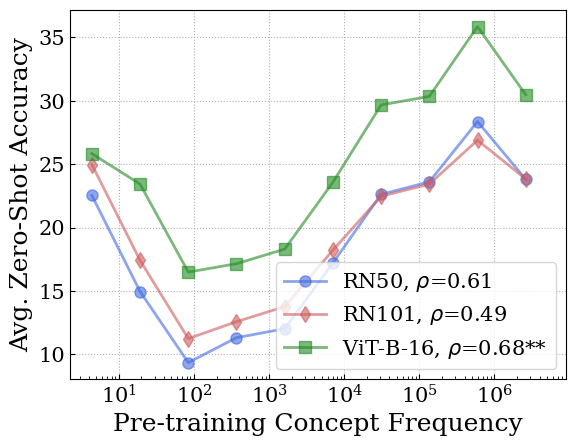

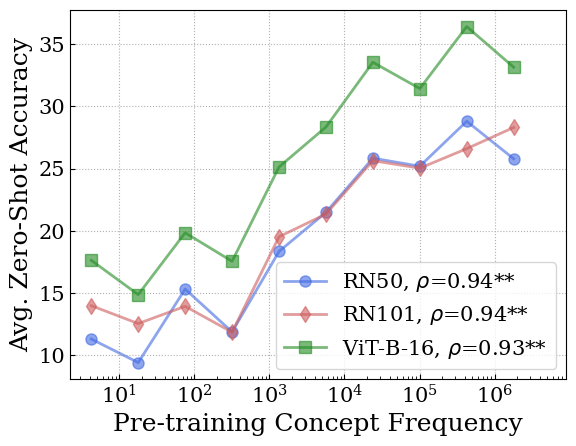

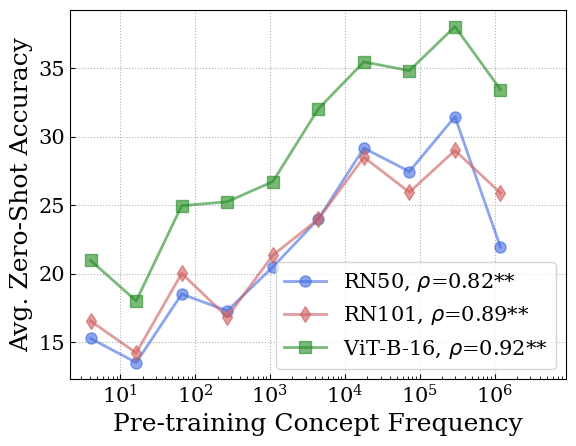

In [10]:
for ist in image_search_types:

    prompt_type = 'class'
    image_search_type = ist
    text_search_type = 'lemmatized'
    pt_dataset = 'yfcc15m'
    integrated_search_type = 'integrated_rampp0.7'
    
    # image-search
    rn50_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    rn101_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'RN101'), 'rb'))
    vitb16_image_res = pickle.load(open(plot_file_template.format(image_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # text-search
    rn50_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    rn101_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'RN101'), 'rb'))
    vitb16_text_res = pickle.load(open(plot_file_template.format(text_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))
    
    # integrated-search
    rn50_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN50'), 'rb'))
    rn101_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'RN101'), 'rb'))
    vitb16_integrated_res = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, 'ViT-B-16'), 'rb'))


    plt.figure(figsize=(6.4, 4.8))
    # image-search
    
    rn50_corr, sig1 = pearsonr(np.log(rn50_image_res['exp_bins'][1:-1]), rn50_image_res['cum_means'][1:-1])
    rn101_corr, sig2 = pearsonr(np.log(rn101_image_res['exp_bins'][1:-1]), rn101_image_res['cum_means'][1:-1])
    vitb16_corr, sig3 = pearsonr(np.log(vitb16_image_res['exp_bins'][1:-1]), vitb16_image_res['cum_means'][1:-1])
    
    add1 = '**' if sig1<0.05 else ''
    add2 = '**' if sig2<0.05 else ''
    add3 = '**' if sig3<0.05 else ''
    
    plt.plot(rn50_image_res['exp_bins'][1:-1], rn50_image_res['cum_means'][1:-1], marker='o', linestyle='solid', label=f'RN50, $\\rho$={rn50_corr:.2f}'+add1, alpha=0.6, markersize=8, linewidth=2, c='royalblue')
    plt.plot(rn101_image_res['exp_bins'][1:-1], rn101_image_res['cum_means'][1:-1], marker='d', linestyle='solid', label=f'RN101, $\\rho$={rn101_corr:.2f}'+add2, alpha=0.6, markersize=8, linewidth=2, c='indianred')
    plt.plot(vitb16_image_res['exp_bins'][1:-1], vitb16_image_res['cum_means'][1:-1], marker='s', linestyle='solid', label=f'ViT-B-16, $\\rho$={vitb16_corr:.2f}'+add3, alpha=0.6, markersize=8, linewidth=2, c='forestgreen')
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel('Avg. Zero-Shot Accuracy')
    plt.xscale('log')
    plt.xlim(0, 9*10**6)
    # sns.despine(trim=True, offset=5)
    plt.legend(loc='lower right', fontsize=15)
    
    # plt.title('Accuracies vs PCF for YFCC-15M\n(Image-search)')
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-zero-shot-yfcc15m-log-linear-plot-image-queried-search-rampp-threshold-{}.png'.format(ist), dpi=500, bbox_inches='tight', transparent=True)

